Numerical eigenvalues (N=10):
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -1.16916997 -0.69027853 -0.31749293 -0.08101405]

Analytical eigenvalues (N=10):
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968 -1.71537032
 -1.16916997 -0.69027853 -0.31749293 -0.08101405]

Maximum error:
7.105427357601002e-15


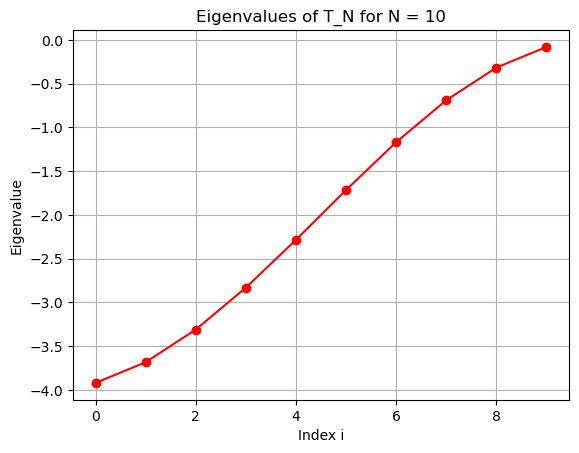

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Construct the N x N tridiagonal matrix T_N
def T_N(N):
    A = -2 * np.eye(N)
    for i in range(N - 1):
        A[i, i + 1] = 1
        A[i + 1, i] = 1
    return A

# Analytical eigenvalues
def analytical_eigenvalues(N):
    i = np.arange(1, N + 1)
    return -2 * (1 - np.cos(np.pi * i / (N + 1)))

N = 10
A = T_N(N)

eig_num = np.sort(np.linalg.eigvals(A))
eig_ana = np.sort(analytical_eigenvalues(N))

print("Numerical eigenvalues (N=10):")
print(eig_num)

print("\nAnalytical eigenvalues (N=10):")
print(eig_ana)

print("\nMaximum error:")
print(np.max(np.abs(eig_num - eig_ana)))

# Plot eigenvalues for N = 10
plt.figure()
plt.plot(eig_num, 'o-', color = 'red')
plt.xlabel("Index i")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of T_N for N = 10")
plt.grid(True)
plt.show()



Since we have a max error between the analytical (via equation) and computed eigenvalues of order 1e-15, the true eigenvalues are the analytical eigenvalues of $\lambda_i = -2(1-\cos(\frac{\pi i}{N+1}))$.

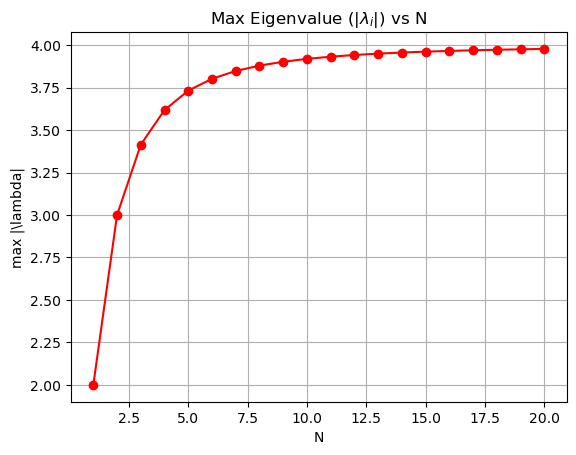

In [6]:

Ns = np.arange(1, 21)
max_abs_lambda = []

for N in Ns:
    eigs = np.linalg.eigvals(T_N(N))
    max_abs_lambda.append(np.max(np.abs(eigs)))

plt.figure()
plt.plot(Ns, max_abs_lambda, 'o-', color = 'red')
plt.xlabel("N")
plt.ylabel(f"max |\lambda|")
plt.title(r"Max Eigenvalue ($|\lambda_{i}|)$ vs N")
plt.grid(True)
plt.show()


The theoretical eigenvalues are
$$
\lambda_i = -2\left(1 - \cos\left(\frac{\pi i}{N+1}\right)\right),
\qquad i = 1, \dots, N.
$$

To understand the behavior of $\max |\lambda_i|$, note that the cosine function
$\cos(\theta)$ is strictly decreasing on the interval $\theta \in [0,\pi]$.
Therefore, the function
$$
p(i) = 1 - \cos\left(\frac{\pi i}{N+1}\right)
$$
is strictly increasing as $i$ increases from $1$ to $N$.

Since $i$ takes only discrete integer values, we do not need to differentiate
with respect to $i$. Instead, monotonicity of the cosine function directly implies
that $p(i)$ is maximized at the largest index, $i = N$. Hence, the eigenvalue with
the largest magnitude is
$$
\lambda_{\max} = \lambda_N
= -2\left(1 - \cos\left(\frac{\pi N}{N+1}\right)\right).
$$

Taking the limit as $N \to \infty$, we observe that
$$
\frac{\pi N}{N+1} \to \pi,
\qquad
\cos\left(\frac{\pi N}{N+1}\right) \to \cos(\pi) = -1.
$$
Substituting into the expression for $\lambda_N$ yields
$$
\lambda_N \to -2(1 - (-1)) = -4.
$$

Therefore,
$$
\max_{1 \le i \le N} |\lambda_i| = |\lambda_N| \to 4
\quad \text{as } N \to \infty.
$$

When $N$ is small, the maximum absolute eigenvalue is strictly less
than $4$. As $N$ increases, the quantity $\frac{\pi N}{N+1}$ moves closer to $\pi$,
causing $\cos\left(\frac{\pi N}{N+1}\right)$ to decrease and $|\lambda_N|$ to
increase.



Thus, the numerical plot of $\max |\lambda|$ versus $N$ increases
monotonically and approaches $4$ as $N$ increases.
